In [398]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [424]:
#creating a function for the integrand, taking argument x
def f(x):
    return ((x**4)*(1-x)**4)/(1+x**2)
    
#defining the function provided for the trapezium rule, which will be used to carry out integration
def trap (f,a,b,n):
    """
    Performs integration using the basic trapezium rule 

    Parameters:
    ------------
    f : Function
        the function being integrated with single argument (x)
    a : Float
        lower limit of integration
    b : Float
        upper limit of integration
    n : Integer
        number of trapezia to use 

    Returns:
    -----------
    Float:
      Approximation of the integral of f(x) from limits a to b

    """
    h = float(b-a)/n
    s = 0.5*(f(a)+f(b))
    for i in range (1,n):
        s = s + f(a+i*h)
    return s*h
print (trap(f, 0, 1, 18))

#18 trapeziums are needed to get a fractional relative error of less than one part in 10^6 (based on printed precision using manual trial and error)

0.0012644899090426126


In [426]:
#using a refinement loop instead of manual trial and error 

#using a starting value of 8 and a tolerance of 6 significant figures
n = 8
delta = 10**-6
I_old = 0
a, b = 0, 1
I_new = trap(f, a, b, n)

#comparing each new integral to the previous one, if the fractional change is greater than 10^-6 then we add another trapezium
while abs(I_new - I_old) > delta * abs(I_new):
    I_old = I_new
    n += 1  
    I_new = trap(f, a, b, n)

print(f"Integral = {I_new:.8f}")
print(f"Converged with n = {n} trapeziums")

Integral = 0.00126449
Converged with n = 15 trapeziums


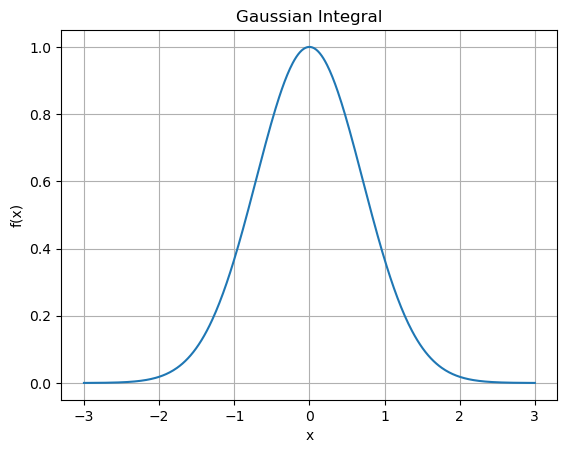

In [428]:
#plotting a gaussian curve 
def gaussian(x):
    return np.exp(-x**2)

#using the linspace function to generate 500 evenly spaced points between my minimum and maximum x values
x = np.linspace(-3,3,500)

#creating corresponding values for the function
y = gaussian(x)

plt.title("Gaussian Integral")
plt.xlabel("x")
plt.ylabel("f(x)")

#adding a grid to make the curves features easier to read
plt.grid(True)

plt.plot(x, y)
plt.show()

In [430]:
def g(x):
    return math.exp(-x**2)

#calculating the value of the integral over 10 different ranges
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    result = trap (g, -i, i, 1000)
    print(f"i = {i}, integral ~ {result}")


i = 1, integral ~ 1.4936477751188677
i = 2, integral ~ 1.764162586158551
i = 3, integral ~ 1.7724146920763713
i = 4, integral ~ 1.7724538235695357
i = 5, integral ~ 1.77245385090279
i = 6, integral ~ 1.7724538509055126
i = 7, integral ~ 1.7724538509055157
i = 8, integral ~ 1.772453850905515
i = 9, integral ~ 1.772453850905515
i = 10, integral ~ 1.7724538509055165


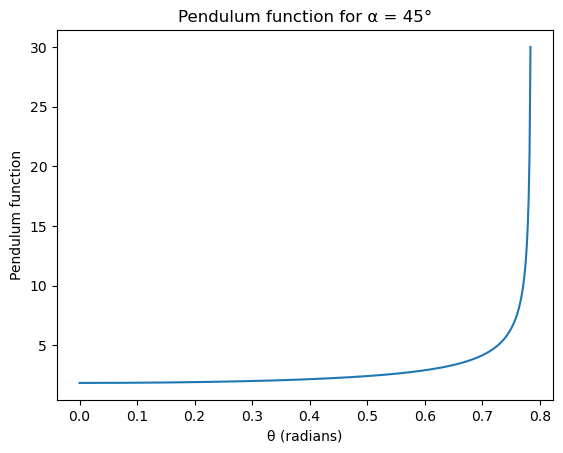

In [432]:
def pendulum (theta, alpha):
    return 1/np.sqrt(np.cos(theta) - np.cos(alpha))

#converting to radians
alpha = np.deg2rad(45)

#creating 500 evenly spaced points between 0 up to, but not including, alpha
theta_x = np.linspace(0, alpha, 500, endpoint = False )

y= pendulum(theta_x, alpha)

plt.title("Pendulum function for α = 45°")
plt.xlabel("θ (radians)")
plt.ylabel("Pendulum function")
plt.plot(theta_x, y)
plt.show()
plt.close()

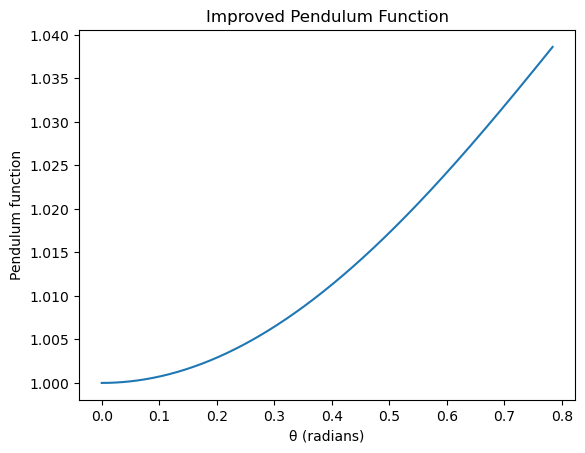

In [434]:
#improved function removing the singularity
def pendulum_new(phi, alpha):
    return 1/np.sqrt(1 - (np.sin(alpha/2)**2 * np.sin(phi)**2))

phi_x = np.linspace(0, alpha, 500, endpoint = False)

y = pendulum_new(phi_x, alpha)

plt.title("Improved Pendulum Function")
plt.xlabel("θ (radians)")
plt.ylabel("Pendulum function")
plt.plot(phi_x,y)
plt.show()

In [436]:
#using delta as tolerance and setting a maximum number of trapziums so the function does not run indefinitely 
max_traps = 600
n_start = 8
delta = 10**-6
    
def trap1(f, a, b, n):
    """
    Refines the integration until there is convergence 
    
    Repeatedly doubles the number of trapezia until the fractional change in the result is below the tolerance.

    Parameters:
    --------------
    f : Function
        function being integrated 
    a : Float 
        lower limit of integration
    b : Float
        upper limit of integration
    n : Integer
        number of trapezia until the function converges

    Returns:
    --------------
    Float:
       converged approximation of  the integral of the given function from limits a to b 

    """
    inew = trap(f, a, b, n)   
    iold = -inew               
    
#comparing how much the integral changes between iterations
#once the fractional change becomes less than delta then the loop will stop
    while abs(inew - iold) > delta * abs(inew):
        #stores the current integral as the previous one to then be used in the next iteration
        iold = inew             
        n = 2 * n               

        #preventing an infinite loop if maximum number of trapeziums is reached then the loop will terminate
        if n > max_traps:
            print("Cannot reach requested accuracy with", max_traps, "trapezia")
            return

        inew = trap(f, a, b, n)

    return inew


In [438]:
#setting a range of 10 evenly spaced amplitudes between 0 and pi/2
alpha = np.linspace(0, np.pi/2, 10)

#creating an empty list so that I can store my ratios created in the loop below
ratios = []

#trap1 only accepts single variable functions so we must account for this since our integrand depends on both phi and alpha
def make_f(alpha):
    """
    Creates a function in terms of phi for a fixed amplitude alpha (α)

    Parameters:
    -------------
    alpha : Float
            amplitude of the pendulum (radians)

    Returns:
    -------------
    A function f(phi) that can then be integrated

    """

    def f(phi):
        return pendulum_new(phi, alpha)
    return f

#each alpha has its own independent function so that trap1 can integrate them
#we integrate the function separately for each value of alpha and calculate the ratios accordingly

for alphas in alpha:
    f = make_f(alphas)
    integral = trap1(f, 0, np.pi/2, n_start)
    
    ratio = (2/np.pi) * integral
    ratios.append(ratio)

print(f"{'Alpha (rads)':>12} {'T / T0':>10}")
print("-" * 24)

#loop through data and print corresponding alpha and ratio values in a table
for alpha, ratio in zip(alpha, ratios):
    print(f"{alpha:12.2f} {ratio:10.5f}")

Alpha (rads)     T / T0
------------------------
        0.00    1.00000
        0.17    1.00191
        0.35    1.00767
        0.52    1.01741
        0.70    1.03134
        0.87    1.04978
        1.05    1.07318
        1.22    1.10214
        1.40    1.13749
        1.57    1.18034


In [440]:
#setting up our standard gaussian curve with a mean of 0 and a standard deviation of 1
# n being the sample size of random numbers generated 

N = 5000
mu = 0
sigma = 1

#minimum and maximum values being minus and plus 4 standard deviations from the mean respectively 
x_min = mu - 4*sigma
x_max = mu + 4*sigma

#the true maximum which is to be used as the upper limit for the height of the curve
f_max = 1/(np.sqrt(2*np.pi)*sigma)

#assigning 5000 randomly generated numbers for x and y between the minimum and maximum values of each axis respectively
x_random = np.random.uniform(x_min, x_max, N)
y_random = np.random.uniform(0, f_max, N)

#tracking 3 different counts: hits inside the curve, hits inside the curve within 2 standard deviations and hits outside the curve 
count_1 = 0 
count_2 = 0
count_3 = 0

#all values must be stored in empty lists so I can retrieve them later for a plot 
x_under = []
y_under = []

x_2sigma = []
y_2sigma = []

x_over = []
y_over = []


for i in range(N):
    #this is the height of the curve at the sampled value
    f_x = (1 / (np.sqrt(2*np.pi) * sigma)) * np.exp(-(x_random[i])**2 / (2*sigma**2))

    #if the height of the random value is less than the height of the curve then count 1 increases by 1 and the coordinates are stored 
    if y_random[i] <= f_x:
        count_1 += 1
        x_under.append(x_random[i])
        y_under.append(y_random[i])
        
        #if the random value is also within 2 standard deviations of the mean then count 2 will increase by 1 and the coordinates are stored 
        if mu - 2*sigma <= x_random[i] <= mu + 2*sigma:
            count_2 += 1
            x_2sigma.append(x_random[i])
            y_2sigma.append(y_random[i])
   
    # if the random value is outside of the curve then count 3 will increase by 1 and the coordinates are stored 
    else:
        count_3 += 1
        x_over.append(x_random[i])
        y_over.append(y_random[i])

#calculating the probability that a random point will be within 2 standard deviations of the curve 
#count 3 is not included in this calculation as outliers will skew the result 

probability = count_2/count_1

print(probability)

0.9539857420609202


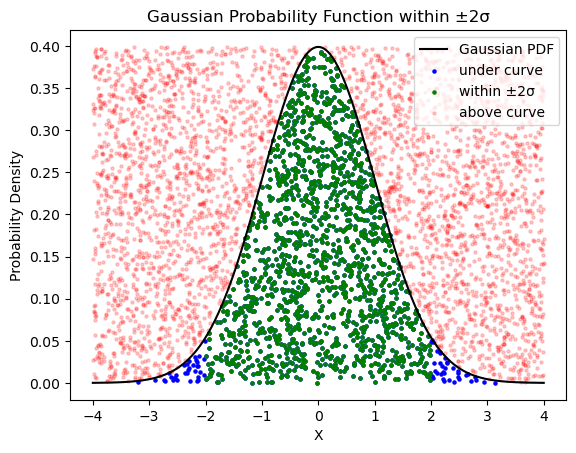

In [442]:
#setting the x curve as 500 evenly spaced points within the min and max values to make a smooth curve
x_curve = np.linspace(x_min, x_max, 500)

#setting the y curve as the probability density function
y_curve =  (1 / (np.sqrt(2*np.pi) * sigma)) * np.exp(-(x_curve - mu)**2 / (2*sigma**2))

#plotting the original Gaussian curve
plt.plot(x_curve, y_curve, color = "black", label = "Gaussian PDF")

#plotting counts 1, 2, and 3 as scatter plots showing each individual point highlighted in different colours
plt.scatter(x_under, y_under, color = "blue", s = 5, label = "under curve")
plt.scatter(x_2sigma, y_2sigma, color = "green", s = 5, label = "within ±2σ" )
plt.scatter(x_over, y_over, color = "red", s = 5, alpha = 0.2, label = "above curve")

plt.title("Gaussian Probability Function within ±2σ")
plt.ylabel("Probability Density")
plt.xlabel("X")
plt.legend()
plt.show()